### **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Importing the Dataset**

In [2]:
dataset = pd.read_csv('50_Startups.csv')

In [3]:
dataset.head(2) ##Gives the top 5 rows if not mentioned

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


### **Data Analysis**

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [5]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

### **Preparing Data as input and output**

In [6]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print(X.shape[0], Y.shape[0])
print(X.shape[1])
print(X.shape, Y.shape)

50 50
4
(50, 4) (50,)


shape() consists of array having two arguments rows and columns. if you search shape[0] then it will gave you the number of rows. shape[1] will gave you number of columns.

In [7]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [8]:
print(Y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


### **Encoding Categorical data**

Here, the last column(State) in X is categorical and so we do columntransform and use onehotencoder tool. At Onehotencoder we give 3 which is 4th column(State) where we're trying to trnasform

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X=np.array (ct.fit_transform(X))

In [10]:
print(X.shape)

(50, 6)


In [11]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

As we split the column according to the categories, 4 cols becomes 6 cols. So, this is how we change the strings to numerical.

### **Splitting the data into the training set and test set**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [13]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(40, 6) (10, 6)
(40,) (10,)


### **Training the Multiple Linear Regression model on the Training set**

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In Multiple Linear Regression, we do not need to do the feature scaling.
LinearRegression class enables us to automatically avoid the dummy variable trap and also automatically identifies the highest acurate variables

### **Predicting the Test set results**

In [15]:
Y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Here, we do the concatenation of the predicted values and real values.
reshape will change the Y_pred and Y_test which are in horizontal to vertical.

**Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')**

In [16]:
print(regressor.predict([[1,0,0,160000,130000,300000]]))

[181566.92]


**Getting the final linear regression equation with the values of the coefficients**

In [17]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


**Variance score: 1 means perfect prediction**

In [18]:
print('Variance score: {}'.format(regressor.score(X_test, Y_test)))

Variance score: 0.9347068473282546


In above example, we determine accuracy score using Explained Variance Score.

We define: explained_variance_score = 1 – Var{y – y’}/Var{y}

where •y’ is the estimated target output, •y the corresponding (correct) target output •Var is Variance, the square of the standard deviation.

*The best possible score is 1.0, lower values are worse.

### **Plot for residual Error**

**Setting plot style**

In [19]:
plt.style.use('fivethirtyeight')

**Plotting residual errors in training data**

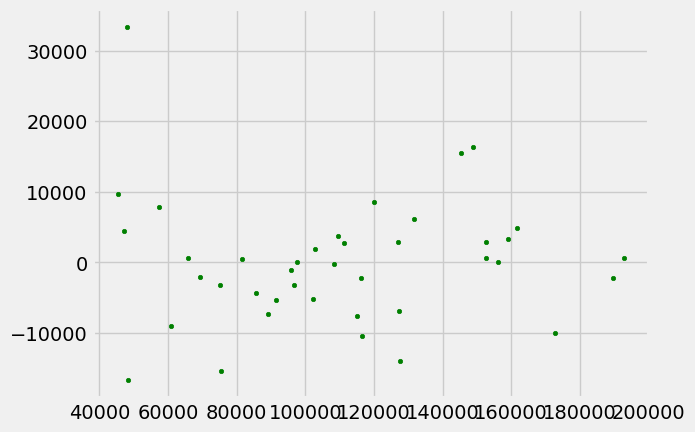

In [20]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-Y_train, color = "green", s = 10, label = 'Train data')


### **Plotting residual errors in test data**

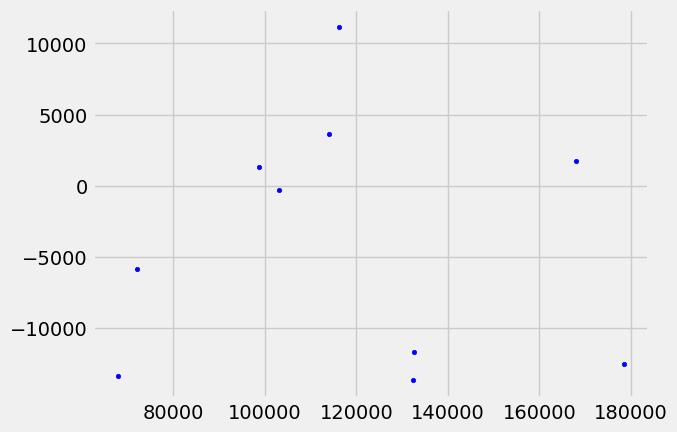

In [21]:
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-Y_test, color = "blue", s = 10, label = 'Test data')

### **Plotting line for zero residual error**

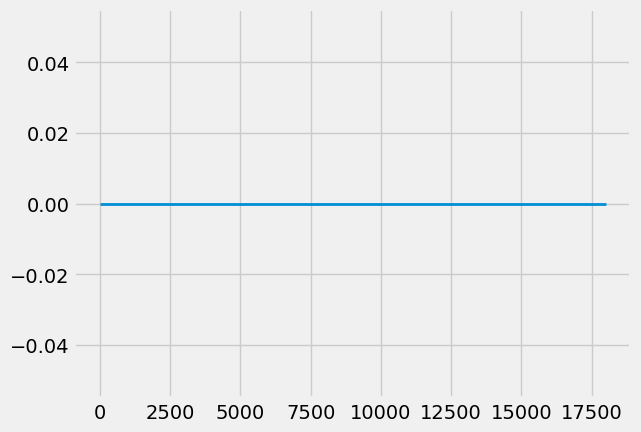

In [22]:
plt.hlines(y = 0, xmin = 0, xmax = 18000, linewidth = 2)

## **Plot**

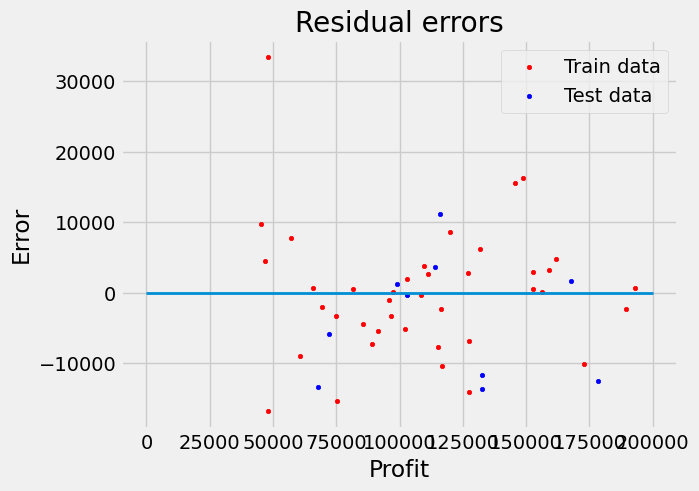

In [23]:
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(X_train), regressor.predict(X_train)-Y_train, color = "red", s = 10, label = 'Train data')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test)-Y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()